# HACKATHON TASK 

In [1]:
# import library
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import scipy

In [3]:
# download dataset
data = pd.read_csv("Downloads/data_1.csv")

In [4]:
# show a few rows of data
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
data.shape

(2227, 3)

In [6]:
data.value_counts().shape

(2203,)

In [7]:
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

## Handle Missing Values

In [8]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [9]:
# from above result, it is clear that output/label has not contain any NULL value.

In [10]:
data[['x1','x2']].isnull().sum()

x1    5
x2    3
dtype: int64

In [11]:
data['x1'].index

RangeIndex(start=0, stop=2227, step=1)

In [12]:
# find rows with missing data
null_data_rows = data[data.isnull().any(axis=1)]
null_data_rows

,x1,x2,y
36,NaN,116.138522,1
44,-99.627522,NaN,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1092,55.162258,NaN,0
1318,NaN,53.182191,0
1430,-74.126054,NaN,0


In [13]:
# it is clear, not any row has both the missing values ['x1' and 'x2']

In [14]:
data[data['x1'].isnull()]

,x1,x2,y
36,NaN,116.138522,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1318,NaN,53.182191,0


In [15]:
# remove null rows
final_data = data.dropna(axis=0, how='any')
final_data.shape

(2219, 3)

In [16]:
final_data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

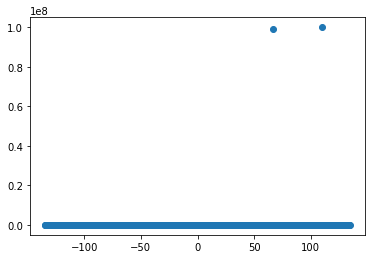

In [17]:
#Visualize final data
plt.scatter(final_data['x1'],final_data['x2'])

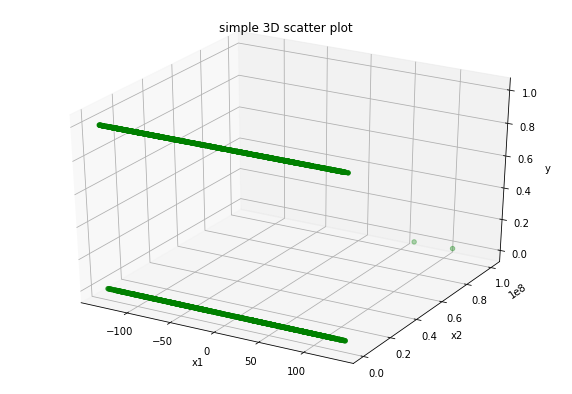

In [18]:
# Creating dataset
z = final_data['y']
x = final_data['x1']
y = final_data['x2']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

# set axis-label
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# show plot
plt.show()



###### From above graph , it is clear that it has 2 outliers

In [19]:
final_data['x2'].max()

99999999.0

In [20]:
final_data['x2'].min()

-134.8761321

In [21]:
final_data.describe()

,x1,x2,y
count,2219.000000,2.219000e+03,2219.000000
mean,-4.771837,8.967782e+04,0.442091
std,74.938264,2.986680e+06,0.496747
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-8.025966e+01,0.000000
50%,-9.750840,-1.566092e+00,0.000000
75%,59.963056,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [22]:
from scipy import stats

### Ouliers detection and removal

#### keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [23]:
final_data =final_data[(np.abs(stats.zscore(final_data)) < 3).all(axis=1)]
final_data.shape

(2217, 3)

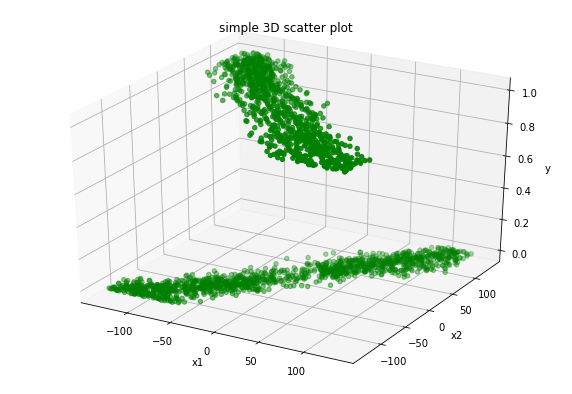

In [24]:
# Creating dataset
z = final_data['y']
x = final_data['x1']
y = final_data['x2']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

# set axis-label
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# show plot
plt.show()


###### Now, this dataset has no outliers, as seen from above graph.

In [25]:
final_data.describe()

,x1,x2,y
count,2217.000000,2217.000000,2217.000000
mean,-4.855645,-6.730568,0.442490
std,74.917277,79.843938,0.496794
min,-134.369160,-134.876132,0.000000
25%,-71.626564,-80.519315,0.000000
50%,-9.922271,-1.827336,0.000000
75%,59.633331,63.622498,1.000000
max,134.508687,134.929748,1.000000


In [26]:
final_data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [27]:
# see summary of dataset
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2217 entries, 0 to 2225
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2217 non-null   float64
 1   x2      2217 non-null   float64
 2   y       2217 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [28]:
# Let's define X and y for our datatset as input_variable and output_variable.

In [29]:
# Converting pandas dataset into Numpy array

In [30]:
X = np.asarray(final_data[['x1','x2']])
X[0:5]

array([[-119.3666687 ,  115.        ],
       [-101.1080445 ,   97.77715859],
       [-130.2786583 ,  106.767654  ],
       [-114.7034152 ,  101.1954767 ],
       [-119.3666687 ,  115.        ]])

In [31]:
y = np.asarray(final_data['y'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

#### also, normalize the dataset

In [32]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.52884438,  1.52495022],
       [-1.28507226,  1.30919525],
       [-1.67453109,  1.4218215 ],
       [-1.46658497,  1.3520174 ],
       [-1.52884438,  1.52495022]])

## Train/Test dataset


Split our dataset into train and test set:

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1773, 2) (1773,)
Test set: (444, 2) (444,)


In [34]:
(444/(1773+443))

0.2003610108303249

## Step - 2: Train different Machine Learning models:

### a. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [36]:
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [37]:
help(LR)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

Note:

This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).

Now we can predict using our test set:

In [38]:
yhat = LR.predict(X_test)
yhat[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [39]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.57589113, 0.42410887],
       [0.56695529, 0.43304471],
       [0.59984188, 0.40015812],
       [0.65646321, 0.34353679],
       [0.61968343, 0.38031657]])

##### Accuracy Calculation

In [40]:
confusion_matrix(y_test, yhat, labels=[1,0])

array([[ 78, 122],
       [  0, 244]], dtype=int64)

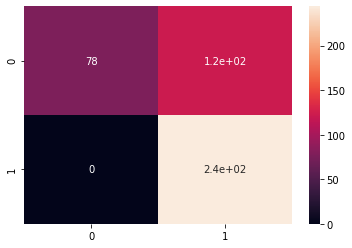

In [41]:
sns.heatmap(confusion_matrix(y_test, yhat, labels=[1,0]),annot=True)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

In [43]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       244
           1       1.00      0.39      0.56       200

    accuracy                           0.73       444
   macro avg       0.83      0.70      0.68       444
weighted avg       0.82      0.73      0.69       444



In [44]:
accuracy_score(y_test, yhat)

0.7252252252252253

for hyperparrameter tunning, we can change the values inside LogisticRegression model

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

### Accuracy of Logistic Regression Model : 72.5%

## b. SVM with Linear Kernel

In [45]:
from sklearn import svm

The SVM algorithm has a number of kernel functions for performing its processing. 

Kernel : mapping data into a higher dimensional space is called kernelling

The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid

### Linear kernel

###### kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'

In [46]:
svm_lin = svm.SVC(kernel='linear')

#fitting data into model
svm_lin.fit(X_train, y_train) 

SVC(kernel='linear')

In [47]:
# model is used to predict value
yhat = svm_lin.predict(X_test)
yhat [0:12]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

### Accuracy Calculation

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score,  jaccard_score

In [49]:
confusion_matrix(y_test, yhat, labels=[1,0])

array([[ 72, 128],
       [  0, 244]], dtype=int64)

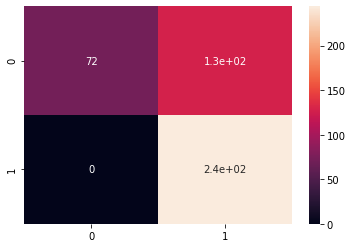

In [50]:
sns.heatmap(confusion_matrix(y_test, yhat, labels=[1,0]),annot=True)

In [51]:
f1_score(y_test, yhat, average='weighted') 

0.673831203242968

In [52]:
jaccard_score(y_test, yhat,pos_label=0)

0.6559139784946236

In [53]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       244
           1       1.00      0.36      0.53       200

    accuracy                           0.71       444
   macro avg       0.83      0.68      0.66       444
weighted avg       0.81      0.71      0.67       444



In [54]:
accuracy_score(y_test, yhat)

0.7117117117117117

#### SVM also has some hyper-parameters (like what C or gamma values to use)

### Accuracy of SVM (Linear-Kernel) Model : 71.2%

## c. SVM with RBF Kernel

In [55]:
svm_rbf = svm.SVC(kernel='rbf')

#fitting data into model
svm_rbf.fit(X_train, y_train) 

SVC()

In [56]:
# model is used to predict value
yhat = svm_rbf.predict(X_test)
yhat [0:12]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

### Accuracy Calculation

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score,  jaccard_score

In [58]:
confusion_matrix(y_test, yhat, labels=[1,0])

array([[180,  20],
       [  2, 242]], dtype=int64)

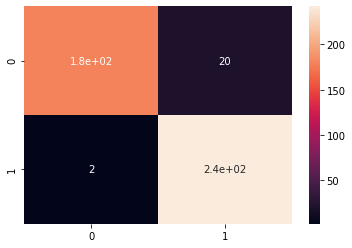

In [59]:
sns.heatmap(confusion_matrix(y_test, yhat, labels=[1,0]),annot=True)

In [60]:
f1_score(y_test, yhat, average='weighted') 

0.9501643687849015

In [61]:
jaccard_score(y_test, yhat,pos_label=0)

0.9166666666666666

In [62]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       244
           1       0.99      0.90      0.94       200

    accuracy                           0.95       444
   macro avg       0.96      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



In [63]:
accuracy_score(y_test, yhat)

0.9504504504504504

### Accuracy of SVM (rbf-Kernel) Model : 95%

# Decision Tree Model

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Creating tree model
tree_model = DecisionTreeClassifier()
tree_model # it shows the default parameters

DecisionTreeClassifier()

In [66]:
# fitting tree model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction

In [67]:
y_pred = tree_model.predict(X_test)

In [68]:
y_pred[:12]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

### Calculating Accuracy

In [69]:
accuracy_score(y_test, y_pred)

0.9414414414414415

In [70]:
from sklearn.tree import plot_tree

[Text(222.6299278846154, 212.26285714285714, 'X[0] <= -0.802\ngini = 0.493\nsamples = 1773\nvalue = [992, 781]'),
 Text(200.33962912087912, 201.90857142857143, 'X[1] <= -0.243\ngini = 0.494\nsamples = 512\nvalue = [229, 283]'),
 Text(196.66050824175827, 191.5542857142857, 'gini = 0.0\nsamples = 229\nvalue = [229, 0]'),
 Text(204.01875, 191.5542857142857, 'gini = 0.0\nsamples = 283\nvalue = [0, 283]'),
 Text(244.92022664835167, 201.90857142857143, 'X[1] <= 0.738\ngini = 0.478\nsamples = 1261\nvalue = [763, 498]'),
 Text(211.3769917582418, 191.5542857142857, 'X[0] <= 0.885\ngini = 0.5\nsamples = 963\nvalue = [480, 483]'),
 Text(155.32788461538462, 181.2, 'X[0] <= -0.114\ngini = 0.486\nsamples = 777\nvalue = [454, 323]'),
 Text(54.26703296703297, 170.84571428571428, 'X[1] <= -0.276\ngini = 0.451\nsamples = 350\nvalue = [230, 120]'),
 Text(20.235164835164838, 160.49142857142857, 'X[1] <= -0.418\ngini = 0.052\nsamples = 223\nvalue = [217, 6]'),
 Text(7.358241758241759, 150.13714285714286, '

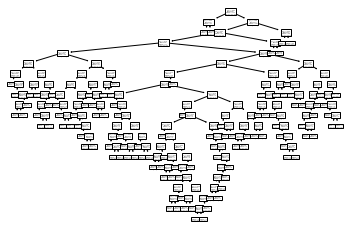

In [71]:
plot_tree(tree_model)

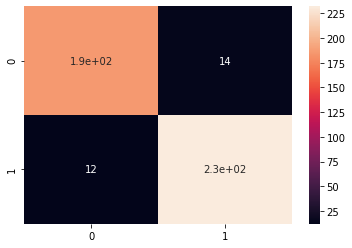

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred, labels=[1,0]),annot=True)

### Accuracy of Decision tree : 94.4%

### hyperparameter tunning

import GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {"max_depth": [2,3,4,5,6],
              "min_samples_split": [20,15,10,5],
              "min_samples_leaf": [10,8,6,4,2]}

In [75]:
param_grid

{'max_depth': [2, 3, 4, 5, 6],
 'min_samples_split': [20, 15, 10, 5],
 'min_samples_leaf': [10, 8, 6, 4, 2]}

In [76]:
[param_grid]

[{'max_depth': [2, 3, 4, 5, 6],
  'min_samples_split': [20, 15, 10, 5],
  'min_samples_leaf': [10, 8, 6, 4, 2]}]

In [77]:
model = DecisionTreeClassifier()

In [78]:
clf = GridSearchCV(model, param_grid)

In [79]:
clf

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 8, 6, 4, 2],
                         'min_samples_split': [20, 15, 10, 5]})

In [80]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [10, 8, 6, 4, 2],
                         'min_samples_split': [20, 15, 10, 5]})

In [81]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20)

In [82]:
# make the final model based on best estimated condition

In [83]:
final_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20)

In [84]:
final_model

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20)

In [85]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20)

In [86]:
y_pred = final_model.predict(X_test)

In [87]:
accuracy_score(y_test,y_pred)

0.9391891891891891

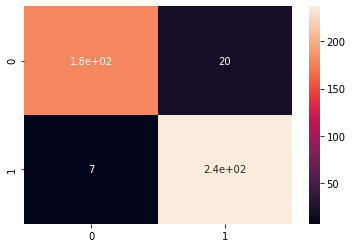

In [88]:
sns.heatmap(confusion_matrix(y_test, y_pred, labels=[1,0]),annot=True)

### Accuracy : 94%

# KNN Model

import library

In [89]:
from sklearn.neighbors import KNeighborsClassifier

#### Training

Let's start the algorithm with k=5 for now:

In [90]:
k = 5
#Train Model   
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

#### Predict Model

In [91]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

#### Accuracy

In [92]:
accuracy_score(y_test, yhat)

0.9369369369369369

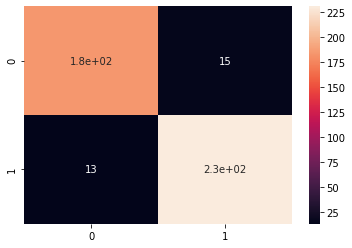

In [93]:
sns.heatmap(confusion_matrix(y_test, yhat, labels=[1,0]),annot=True)

###### Again, Build the model with K=6

In [94]:
k = 9
#Train Model   
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

##### Predict Model

In [95]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

##### Accuracy

In [96]:
accuracy_score(y_test, yhat)

0.9504504504504504

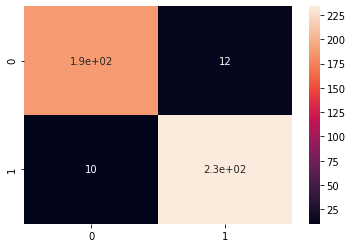

In [97]:
sns.heatmap(confusion_matrix(y_test, yhat, labels=[1,0]),annot=True)

### Hyperparameter tunning

import library

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19]}

In [100]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [101]:
clf = GridSearchCV(model, param_grid)

In [102]:
clf

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [103]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [104]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [105]:
# make the final model based on best estimated condition

In [106]:
final_model = KNeighborsClassifier(n_neighbors=19)

In [107]:
final_model

KNeighborsClassifier(n_neighbors=19)

In [108]:
final_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [109]:
y_pred = final_model.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred)

0.9527027027027027

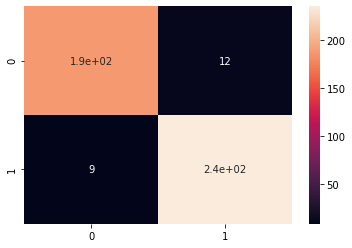

In [111]:
sns.heatmap(confusion_matrix(y_test, y_pred, labels=[1,0]),annot=True)

### Accuracy of KNN with n_neighbors=19 is : 95.3%

# ACCURACY OF MODELS

Logisic Regression |SVM_LINEAR  | SVM_rbf | DECISION TREE | KNN |
-------------------|------------|---------|---------------|-----|
72.5%              |71.2 %      |95%      |94.4%          |95.3 |

# For this dataset, SVM(kernel='rbf'), Decision Tree and KNN Model give higher accuracy.

END